In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



In [3]:
data = pd.read_csv('inventory_data.csv',delimiter=";")
data
data.describe()


,Quantity,Cost_in_rub
count,16.000000,16.00000
mean,1672.937500,1265.50000
std,836.770177,1964.87377
min,346.000000,14.00000
25%,1010.500000,81.00000
50%,1543.000000,508.50000
75%,2413.500000,1327.75000
max,2895.000000,7349.00000


In [4]:
labels=data['Name']
data = data.drop(columns=['Name'])
data['Arrive_date']=pd.to_datetime(data['Arrive_date'],format='%d.%m.%Y')
data['Sell_date']=pd.to_datetime(data['Sell_date'],format='%d.%m.%Y')
data['Arrive_date']=data.Arrive_date.values.astype(np.int64) // 10 ** 9
data['Sell_date']=data.Sell_date.values.astype(np.int64) // 10 ** 9
data


,Quantity,Cost_in_rub,Arrive_date,Sell_date
0,1496,14,1662595200,1665446400
1,1332,1063,1661385600,1667520000
2,702,1679,1665360000,1667779200
3,2895,557,1662336000,1666656000
4,1992,1327,1663200000,1664668800
5,2718,7349,1662940800,1664755200
6,519,1330,1663372800,1666224000
7,898,22,1662508800,1669593600
8,2415,22,1663977600,1670976000
9,1590,460,1662854400,1669420800


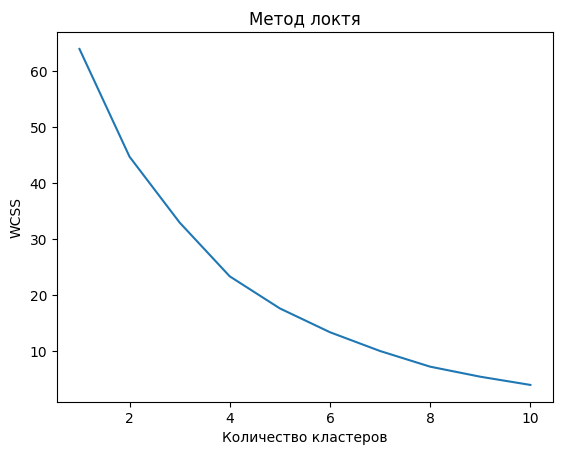

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()


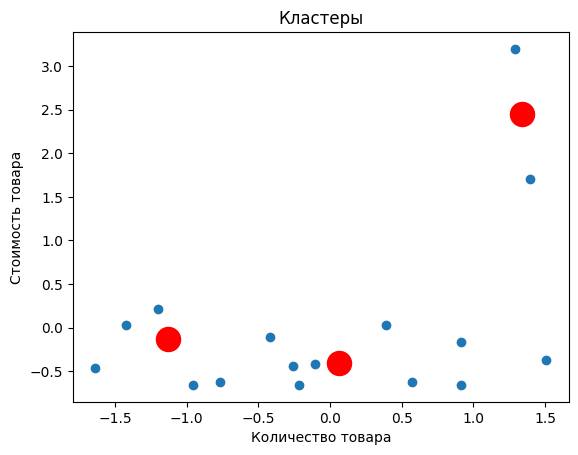

,Quantity,Cost_in_rub,Arrive_date,Sell_date,Cluster,Name
0,1496,14,1662595200,1665446400,0,Артматура гладкая
1,1332,1063,1661385600,1667520000,0,Лист горячекатный
2,702,1679,1665360000,1667779200,2,Лист рифлёный
3,2895,557,1662336000,1666656000,0,Лист холоднокатный
4,1992,1327,1663200000,1664668800,0,Балка
5,2718,7349,1662940800,1664755200,1,Рельсы
6,519,1330,1663372800,1666224000,2,Шпунт
7,898,22,1662508800,1669593600,0,Арматура рифленая
8,2415,22,1663977600,1670976000,0,Артматура катанка
9,1590,460,1662854400,1669420800,0,Сортовой прокат Квадрат


In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(scaled_data)
plt.scatter(scaled_data[:,0], scaled_data[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Кластеры')
plt.xlabel('Количество товара')
plt.ylabel('Стоимость товара')
plt.show()
data['Cluster'] = pred_y
data.groupby(['Cluster']).mean()
data
data['Name']=labels
data